<img src="./images/YCbCr.png" width="250" align="left"/><img src="./images/rgb.png" width="300" align="rigth"/>


# Appendix 2. Color spaces

In this notebook, we will cover some important color spaces used in computer vision.

A **color model** is an abstract mathematical model describing the way colors can be represented as tuples of numbers.

In openCV color images are read by default as BGR images:

In [27]:
import cv2
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt 
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
images_path = './images/'

In [6]:
image_bgr = cv2.imread(images_path + 'etsii.jpg',-1)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

pixel_bgr = image_bgr[0,0,:]
pixel_rgb = image_rgb[0,0,:]

print("BGR: ", pixel_bgr, "\nRGB: ", pixel_rgb)

BGR:  [43 29 35] 
RGB:  [35 29 43]


There are more than 150 color-space conversion methods available in OpenCV. But we will look into two, which are most widely used ones:  
BGR $\iff$ RGB and BGR $\iff$ YCrCb.

In [13]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_BGR2')]
print(flags)

['COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_BGR2HSV_FULL', 'COLOR_BGR2LAB', 'COLOR_BGR2LUV', 'COLOR_BGR2Lab', 'COLOR_BGR2Luv', 'COLOR_BGR2RGB', 'COLOR_BGR2RGBA', 'COLOR_BGR2XYZ', 'COLOR_BGR2YCR_CB', 'COLOR_BGR2YCrCb', 'COLOR_BGR2YUV', 'COLOR_BGR2YUV_I420', 'COLOR_BGR2YUV_IYUV', 'COLOR_BGR2YUV_YV12']


You already are familiar with **RGB** (and its color permutations) and **grayscale**. But, what is **YCrCb** color space?

In [15]:
image_YCrCb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YCrCb)
pixel_YCrCb = image_YCrCb[0,0,:]

print("BGR: ", pixel_bgr, "\nYCrCb: ", pixel_YCrCb)

BGR:  [43 29 35] 
YCrCb:  [ 32 130 134]


YCrCb is one of multiple colour models (also HSL, YUV...) that separate intensity from colour information. This means that one image band is a copy of the grayscale image (containing pixel intensities), it uses to be the fist band. The other two bands contain information about color (not pixel intensity).

<img src="./images/color_conversion.png" width="800" align="left"/>

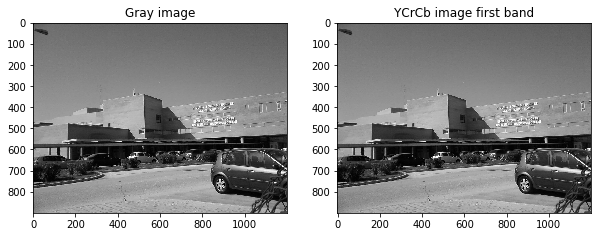

In [33]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(1)

plt.subplot(1,2,1)
plt.imshow(image_gray, cmap='gray')
plt.title('Gray image')

plt.subplot(1,2,2)
plt.imshow(image_YCrCb[:,:,0], cmap='gray')
plt.title('YCrCb image first band')

plt.show()

The difference between grayscale and YCrCb is that **grayscale can not be reconverted to BGR** or RGB.

This have many applications, like JPEG compression or object tracking. We are going to use this color space to **process color images like grayscale images**. There are some methods like histogram equalization (notebook 2.3) that are not possible to apply in RGB images, so usually it is made in first band of YCrCb (or similar) and the reconverted it back to RGB.